In [1]:
from pyomo.environ import *
from pyomo.opt import SolverFactory

# Create a Pyomo model
model = ConcreteModel()

# Define parameters
C_internal = 750000  # Cost of internal maintenance per fault type
C_external_normal = 50000  # Cost of external maintenance per trip during the normal season
C_external_high_demand = 150000  # Cost of external maintenance per trip during the high-demand season

# Define decision variables
model.x_internal = Var(domain=NonNegativeIntegers)  # Number of internal maintenance actions
model.x_external_normal = Var(domain=NonNegativeIntegers)  # External maintenance actions during normal season
model.x_external_high_demand = Var(domain=NonNegativeIntegers)  # External maintenance actions during high-demand season

# Define objective function (example: minimize total maintenance cost)
def objective_rule(model):
    return (C_internal * model.x_internal +
            C_external_normal * model.x_external_normal +
            C_external_high_demand * model.x_external_high_demand)
model.objective = Objective(rule=objective_rule, sense=minimize)

# Define constraints

# Internal Maintenance Constraint
model.internal_constraint = Constraint(
    expr=(C_external_normal * model.x_external_normal +
          C_external_high_demand * model.x_external_high_demand <=
          C_internal * model.x_internal)
)

# Add a maintenance demand constraint
faults_to_address = 100  # Example value
model.maintenance_demand = Constraint(
    expr=(model.x_internal + model.x_external_normal + model.x_external_high_demand >= faults_to_address)
)

# Solve the model using Gurobi solver
gurobi_path = '/Users/aushanaehaller/anaconda3/envs/turbine_env/bin/gurobi_cl'
solver = SolverFactory('gurobi', executable=gurobi_path)
results = solver.solve(model, tee=True)

# Display results
x_internal = model.x_internal.value
x_external_normal = model.x_external_normal.value
x_external_high_demand = model.x_external_high_demand.value
total_cost = model.objective()

print("Optimal Solution:")
print(f"x_internal: {x_internal}")
print(f"x_external_normal: {x_external_normal}")
print(f"x_external_high_demand: {x_external_high_demand}")
print(f"Total Cost: {total_cost}")


Read LP format model from file /var/folders/gc/lxb9l40d205c1603s2q2rzxc0000gn/T/tmpblltadog.pyomo.lp
Reading time = 0.00 seconds
x1: 2 rows, 3 columns, 6 nonzeros
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[arm] - Darwin 23.5.0 23F79)

CPU model: Apple M2 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 2 rows, 3 columns and 6 nonzeros
Model fingerprint: 0x55610d82
Variable types: 0 continuous, 3 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+05]
  Objective range  [5e+04, 8e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+02, 1e+02]
Found heuristic solution: objective 7.500000e+07
Presolve removed 0 rows and 1 columns
Presolve time: 0.00s
Presolved: 2 rows, 2 columns, 4 nonzeros
Variable types: 0 continuous, 2 integer (0 binary)

Root relaxation: objective 9.900000e+06, 0 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      | 

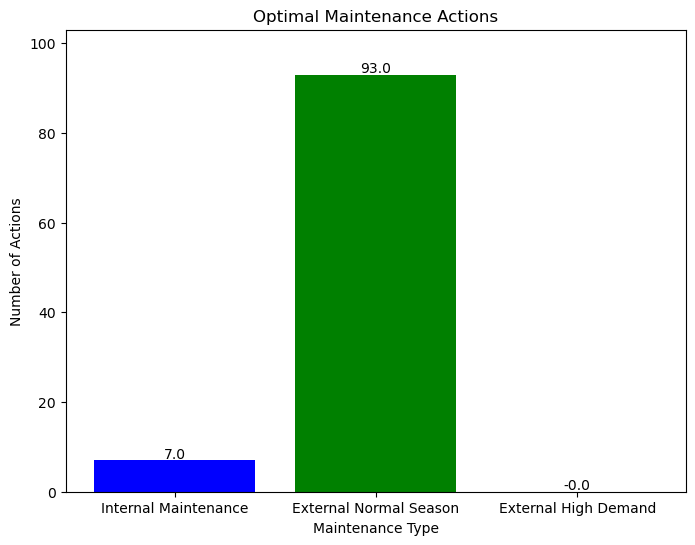

In [19]:
import matplotlib.pyplot as plt

# Visualization
labels = ['Internal Maintenance', 'External Normal Season', 'External High Demand']
values = [x_internal, x_external_normal, x_external_high_demand]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'green', 'red'])
plt.title('Optimal Maintenance Actions')
plt.ylabel('Number of Actions')
plt.xlabel('Maintenance Type')
plt.ylim(0, max(values) + 10)

# Annotate values on bars
for i, v in enumerate(values):
    plt.text(i, v + 0.5, f'{v:.1f}', ha='center', fontsize=10)

plt.show()

In [15]:
import pandas as pd
faults = pd.read_csv("../data/processed/faultscada.csv")
faults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49556 entries, 0 to 49555
Data columns (total 67 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   DateTime                                           49556 non-null  object 
 1   Time                                               49556 non-null  float64
 2   Fault                                              553 non-null    object 
 3   Error                                              49032 non-null  float64
 4   WEC: ava. windspeed                                49032 non-null  float64
 5   WEC: max. windspeed                                49032 non-null  float64
 6   WEC: min. windspeed                                49032 non-null  float64
 7   WEC: ava. Rotation                                 49032 non-null  float64
 8   WEC: max. Rotation                                 49032 non-null  float64
 9   WEC: m

/var/folders/gc/lxb9l40d205c1603s2q2rzxc0000gn/T/ipykernel_93759/1927828127.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  faults = pd.read_csv("../data/processed/faultscada.csv")
